## Training

In [1]:
import h5py
#import cv2
import os 
import numpy as np
import torch
import pandas as pd

## Change base path based on intended feature to upscale
# base_dir = '../pt_files_crv/'
# base_dir = '../pt_files_biov3/'
base_dir = '../../../../../../pt_bio/'
f_dir = os.listdir(base_dir)
h5_files = []
# h5_files_train = []
h5_files2x = []
# Iterate over all files in the directory
for filename in f_dir:
    ## Upsampling naming convention
    if (filename.endswith(".pt")) & ((("2xresolution" in filename))):
        h5_files2x.append(base_dir+filename)
    if (filename.endswith(".pt")) & ((("1xresolution" in filename))):
        h5_files.append(base_dir+filename)

    ## Upscaling naming convention
    # if (filename.endswith(".pt")) & ((("1x" in filename))):
    #     h5_files.append(base_dir+filename)
    # if (filename.endswith(".pt")) & ((("10x" in filename))):
    #     h5_files2x.append(base_dir+filename)



from torch.utils.data import Dataset

h5_files = np.sort(h5_files)
h5_files2x=np.sort(h5_files2x)

num_time_steps = 114
num_features = 1 


class VelDataset(Dataset):
    def __init__(self, x_fname, target_fname):
        self.x_fname = x_fname
        self.target_fname = target_fname

    def __len__(self):
        return len(self.x_fname)

    def __getitem__(self, idx):
        file1 = self.x_fname[idx]
        file2 = self.target_fname[idx]
        low_scale = torch.load(file1)[:,:,:,0].float()
        high_scale = torch.load(file2)[:,:,:,0].float()
        
        return low_scale, high_scale

In [2]:
len(h5_files2x)

60

In [3]:
# sorted_arr2 = h5_files_train[sorted_indices]
# xtest = sorted_arr2[0:36]
xtrain = np.concatenate([h5_files[0::5],h5_files[1::5], h5_files[2::5], h5_files[3::5]])
xtest = h5_files[4::5]
xtrain

array(['../../../../../../pt_bio/gaining_14_10_1xscale_1xresolution.pt',
       '../../../../../../pt_bio/gaining_22_21_1xscale_1xresolution.pt',
       '../../../../../../pt_bio/gaining_27_7_1xscale_1xresolution.pt',
       '../../../../../../pt_bio/gaining_33_15_1xscale_1xresolution.pt',
       '../../../../../../pt_bio/gaining_35_7_1xscale_1xresolution.pt',
       '../../../../../../pt_bio/gaining_41_12_1xscale_1xresolution.pt',
       '../../../../../../pt_bio/gaining_50_25_1xscale_1xresolution.pt',
       '../../../../../../pt_bio/high_gaining_18_10_1xscale_1xresolution.pt',
       '../../../../../../pt_bio/high_gaining_27_7_1xscale_1xresolution.pt',
       '../../../../../../pt_bio/high_gaining_35_23_1xscale_1xresolution.pt',
       '../../../../../../pt_bio/high_gaining_40_17_1xscale_1xresolution.pt',
       '../../../../../../pt_bio/high_gaining_45_19_1xscale_1xresolution.pt',
       '../../../../../../pt_bio/gaining_17_22_1xscale_1xresolution.pt',
       '../../../../../../pt_

In [4]:
ytrain = np.concatenate([h5_files2x[0::5],h5_files2x[1::5], h5_files2x[2::5], h5_files2x[3::5]])
ytest = h5_files2x[4::5]
ytrain

array(['../../../../../../pt_bio/gaining_14_10_1xscale_2xresolution.pt',
       '../../../../../../pt_bio/gaining_22_21_1xscale_2xresolution.pt',
       '../../../../../../pt_bio/gaining_27_7_1xscale_2xresolution.pt',
       '../../../../../../pt_bio/gaining_33_15_1xscale_2xresolution.pt',
       '../../../../../../pt_bio/gaining_35_7_1xscale_2xresolution.pt',
       '../../../../../../pt_bio/gaining_41_12_1xscale_2xresolution.pt',
       '../../../../../../pt_bio/gaining_50_25_1xscale_2xresolution.pt',
       '../../../../../../pt_bio/high_gaining_18_10_1xscale_2xresolution.pt',
       '../../../../../../pt_bio/high_gaining_27_7_1xscale_2xresolution.pt',
       '../../../../../../pt_bio/high_gaining_35_23_1xscale_2xresolution.pt',
       '../../../../../../pt_bio/high_gaining_40_17_1xscale_2xresolution.pt',
       '../../../../../../pt_bio/high_gaining_45_19_1xscale_2xresolution.pt',
       '../../../../../../pt_bio/gaining_17_22_1xscale_2xresolution.pt',
       '../../../../../../pt_

In [5]:
xtest

array(['../../../../../../pt_bio/gaining_22_16_1xscale_1xresolution.pt',
       '../../../../../../pt_bio/gaining_27_14_1xscale_1xresolution.pt',
       '../../../../../../pt_bio/gaining_31_7_1xscale_1xresolution.pt',
       '../../../../../../pt_bio/gaining_35_23_1xscale_1xresolution.pt',
       '../../../../../../pt_bio/gaining_40_8_1xscale_1xresolution.pt',
       '../../../../../../pt_bio/gaining_49_10_1xscale_1xresolution.pt',
       '../../../../../../pt_bio/high_gaining_17_22_1xscale_1xresolution.pt',
       '../../../../../../pt_bio/high_gaining_26_16_1xscale_1xresolution.pt',
       '../../../../../../pt_bio/high_gaining_34_21_1xscale_1xresolution.pt',
       '../../../../../../pt_bio/high_gaining_39_13_1xscale_1xresolution.pt',
       '../../../../../../pt_bio/high_gaining_42_11_1xscale_1xresolution.pt',
       '../../../../../../pt_bio/high_gaining_53_9_1xscale_1xresolution.pt'],
      dtype='<U67')

In [6]:
ytest

array(['../../../../../../pt_bio/gaining_22_16_1xscale_2xresolution.pt',
       '../../../../../../pt_bio/gaining_27_14_1xscale_2xresolution.pt',
       '../../../../../../pt_bio/gaining_31_7_1xscale_2xresolution.pt',
       '../../../../../../pt_bio/gaining_35_23_1xscale_2xresolution.pt',
       '../../../../../../pt_bio/gaining_40_8_1xscale_2xresolution.pt',
       '../../../../../../pt_bio/gaining_49_10_1xscale_2xresolution.pt',
       '../../../../../../pt_bio/high_gaining_17_22_1xscale_2xresolution.pt',
       '../../../../../../pt_bio/high_gaining_26_16_1xscale_2xresolution.pt',
       '../../../../../../pt_bio/high_gaining_34_21_1xscale_2xresolution.pt',
       '../../../../../../pt_bio/high_gaining_39_13_1xscale_2xresolution.pt',
       '../../../../../../pt_bio/high_gaining_42_11_1xscale_2xresolution.pt',
       '../../../../../../pt_bio/high_gaining_53_9_1xscale_2xresolution.pt'],
      dtype='<U67')

In [7]:
len(xtrain)
# len(xtest)

48

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

#xtrain = ([h5_files_train[i] for i in range(len(h5_files_train)) if i%5])
#ytrain = ([h5_files[i] for i in range(len(h5_files)) if  i%5])

import random
#indices = list(range(len(h5_files)))

# Shuffle the indices
#random.shuffle(indices)

ytrain
dataset = VelDataset(xtrain,ytrain)
dataloader = DataLoader(dataset, batch_size=4, shuffle=True,  num_workers=0, drop_last=False)
x,y = next(iter(dataloader))
x.shape


C:\Users\marcb\AppData\Local\Temp\ipykernel_23432\2657986993.py:52: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  low_scale = torch.load(file1)[:,:,:,0].float()
C:\Users\mar

torch.Size([4, 43, 100, 200])

In [9]:
len(ytrain)

48

In [10]:
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

In [11]:
len(ytest)

12

In [12]:
#xtest = ([h5_files_train[i] for i in range(len(h5_files_train)) if not i%5])
#ytest = ([h5_files[i] for i in range(len(h5_files)) if  not i%5])

test_dataset = VelDataset(xtest,ytest)
test_dataloader = DataLoader(test_dataset, batch_size=6, shuffle=False, drop_last=False, num_workers=0)
#model1.to(device)
#model1
len(ytest)

12

In [13]:
import gc
torch.cuda.empty_cache()
gc.collect()

0

In [14]:
device='cuda'


class STAM(nn.Module):
    def __init__(self, tdim=114,xdim=100,ydim=2000,hidden_dim=128):
        super(STAM, self).__init__()
        self.m1=nn.Sequential(
                    nn.Conv2d(tdim, hidden_dim//4, kernel_size=5, padding=2),
                    nn.LeakyReLU(negative_slope=.2),
                    nn.Conv2d(hidden_dim//4, tdim, kernel_size=1, padding=0),
                    nn.LeakyReLU(negative_slope=.2),
                    nn.Linear(ydim,1),
                    nn.Sigmoid(),
                )
        self.m2=nn.Sequential(
                    nn.Conv2d(ydim, hidden_dim, kernel_size=5, padding=2),
                    nn.LeakyReLU(negative_slope=.2),
                    nn.Dropout(.1),
                    nn.Conv2d(hidden_dim, ydim, kernel_size=1, padding=0),
                    nn.LeakyReLU(negative_slope=.2),
                    nn.Linear(tdim,1),
                    nn.Sigmoid(),
                )
        self.sigmoid=nn.Sigmoid()
        self.m3=nn.Sequential(
                    nn.Conv2d(xdim, hidden_dim//2, kernel_size=5, padding=2),
                    nn.LeakyReLU(negative_slope=.2),
                    nn.Conv2d(hidden_dim//2, xdim, kernel_size=1, padding=0),
                    nn.LeakyReLU(negative_slope=.2),
                    nn.Linear(ydim,1),
                    nn.Sigmoid(),
        )
        self.m4=nn.Sequential(
                    nn.Conv2d(tdim, hidden_dim//2, kernel_size=5, padding=2),
                    nn.LeakyReLU(negative_slope=.2),
                    nn.Conv2d(hidden_dim//2, tdim, kernel_size=1, padding=0),
                    nn.LeakyReLU(negative_slope=.2),
                    nn.Linear(xdim,1),
                    nn.Sigmoid(),
        )
    def forward(self, x):
        x1 = self.m1(x)
        x2 = x.permute(0,3,2,1)
        x3 = x.permute(0,2,1,3)
        x4 = x.permute(0,1,3,2)
        x2 = self.m2(x2)
        x3 = self.m3(x3)
        x4 = self.m4(x4)
        x1=x*x1+x
        x2=x*x2.permute(0,3,2,1)+x
        x3=x*x3.permute(0,2,1,3)+x
        x4=x*x4.permute(0,1,3,2)+x
        x = x*self.sigmoid((x1+x2+x3+x4)/4)+x
        return x


### tdim=114 for upscaling and 43 for upsampling
class ECA(nn.Module):
    def __init__(self, tdim=114,xdim=100,ydim=2000):
        super(ECA, self).__init__()
        self.sigmoid=nn.Sigmoid()
        self.c1=nn.Conv1d(1, 1, kernel_size=1, padding=0, bias=True)
    def forward(self, x):
        b,t,h,w = x.shape
        y2_3=self.c1(x.mean((2, 3)).view(x.shape[0], 1, -1))
        y2_3=y2_3.view(b, 43, 1, 1)
        x=(self.sigmoid(y2_3)*x)
        return x



class STAMNet_upscale(nn.Module):
    def __init__(self):
        super(STAMNet_upscale, self).__init__()
        #set self.attention = ECA() to use efficient channel attention
        self.attention = STAM()
        self.fc1 = nn.Linear(200, 2000)
        self.fc3 = nn.Linear(2000, 8000)
        self.dropout = nn.Dropout(0.2)
        self.fc4 = nn.Linear(8000, 2000)
        self.fc5 = nn.Linear(2000, 2000)              
    def forward(self, x):
        x = F.leaky_relu(self.fc1(x), negative_slope=.2)
        x = F.leaky_relu(self.attention(x), negative_slope=.2)
        x = self.dropout(x)     
        x = F.leaky_relu(self.fc3(x), negative_slope=.2)      
        x = F.leaky_relu(self.fc4(x), negative_slope=.2)
        x = self.fc5(x)
        return x
        


class STAMNet_upsample(nn.Module):
    def __init__(self):
        super(STAMNet_upsample, self).__init__()
        self.attention = STAM(tdim=43, xdim=100, ydim=1200)
        self.fc1 = nn.Linear(200, 1200)
        self.fc12 = nn.Linear(1200, 400)
        self.fc2 = nn.Linear(100, 800)
        self.fc22 = nn.Linear(800, 200)
        self.fc3 = nn.Linear(400, 2000)
        self.fc32 = nn.Linear(2000, 400)               
    def forward(self, x):
        x = F.leaky_relu(self.fc1(x), negative_slope=.2)
        x = F.leaky_relu(self.attention(x), negative_slope=.2)
        x = F.leaky_relu(self.fc12(x), negative_slope=.2)
        x = x.permute(0,1,3,2)
        x = F.leaky_relu(self.fc2(x), negative_slope=.2)
        x = F.leaky_relu(self.fc22(x), negative_slope=.2)
        x = x.permute(0,1,3,2)
        x = F.leaky_relu(self.fc3(x), negative_slope=.2)
        x = self.fc32(x)
        return x


class simple_MLP(nn.Module):
    def __init__(self):
        super(simple_MLP, self).__init__()
        self.fc1 = nn.Linear(200, 2000)          
    def forward(self, x):
        x = self.fc1(x)
        return x


class upscale_interp(nn.Module):
    def __init__(self):
        super(upscale_interp, self).__init__()
        self.fc3 = nn.Linear(2000, 8000)
        self.dropout = nn.Dropout(0.2)
        self.fc4 = nn.Linear(8000, 2000)
        self.fc5 = nn.Linear(2000, 2000)       
    def forward(self, x):
        x = F.leaky_relu(x.repeat_interleave(10, dim=3), negative_slope=.2)
        x = self.dropout(x)
        x = F.leaky_relu(self.fc3(x), negative_slope=.2)
        x = F.leaky_relu(self.fc4(x), negative_slope=.2)
        x = self.fc5(x)
        return x

In [15]:
import torch
from torch.utils.data import Dataset, DataLoader
from torch.optim.lr_scheduler import ExponentialLR
import gc
import csv
import numpy as np
from torchmetrics.regression import MeanAbsolutePercentageError
from sklearn.metrics import r2_score
import warnings
import hydroeval as he
import warnings
warnings.filterwarnings("ignore")

# warnings.filterwarnings("ignore", category=UserWarning)  # Suppress any sklearn warnings

# Function to compute Nash-Sutcliffe Efficiency
def compute_nse(observed, simulated):
    observed = np.array(observed)
    simulated = np.array(simulated)
    numerator = np.sum((observed - simulated) ** 2)
    denominator = np.sum((observed - np.mean(observed)) ** 2)
    # Handle division by zero
    if denominator == 0:
        return np.nan
    return 1 - numerator / denominator

# Initialize lists to store final scor
final_mses_noatt2 = []
final_mapes_noatt2 = []
final_r2_noatt2 = []
final_nse_noatt2 = []

# Loop over multiple runs
for m in range(6):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    # model1 = ConvLSTMUNet_upscaled().to(device)
    model1 = STAMNet_upsample().to(device)
    torch.cuda.empty_cache()
    gc.collect()
    criterion1 = nn.HuberLoss()
    criterion2 = nn.MSELoss()
    criterion4 = nn.L1Loss()
    criterion3 = MeanAbsolutePercentageError().to(device)
    # Upsampling
    optimizer1 = optim.AdamW(model1.parameters(), lr=0.0006, weight_decay=.01)
    #upscaling
    # optimizer1 = optim.AdamW(model1.parameters(), lr=0.00016, weight_decay=.05)
    # optimizer1 = optim.AdamW(model1.parameters(), lr=0.0003, weight_decay=.03)
    
    gamma = 0.999950
    #upsampling
    scheduler1 = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer1, 12000,2)
    #upscaling
    # scheduler1 = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer1, 1600,2)
    torch.cuda.empty_cache()
    gc.collect()
    
  
    # Training loop
    # upscaling
    # num_epochs =  25
    # upsampling
    num_epochs =  960
    # num_epochs =  110
    for epoch in range(num_epochs):
        model1.train()
        count = 0
        running_loss = 0
        for batch in dataloader:
            inputs = batch[0].to(device)
            labels = batch[1].to(device)
            optimizer1.zero_grad()
            outputs = model1(inputs)
            loss = criterion2(outputs, labels)+criterion4(outputs, labels)*.6
            loss.backward()
            optimizer1.step()
            scheduler1.step()
            count += 1
            running_loss += loss.item()
        torch.cuda.empty_cache()
        gc.collect()
    
        # Model testing
        model1.eval()
        nn_errors = []
        orig_errors = []
        nn_mapes = []
        orig_mapes = []
        nn_r2 = []
        orig_r2 = []
        nn_mae = []
        orig_mae = []
    
        with torch.no_grad():
            for inp, lab in test_dataloader:
                inp = inp.to(device)
                lab = lab.to(device)
                outp = model1(inp)
                outp = outp*765.37635#0.00545423*1000# 0.00757384*1000 #765.37635
                #inp = inp*765.37635
                lab = lab*765.37635#0.00545423*1000# 0.00757384*1000 #765.37635 #.00545423
                # inp = inp.squeeze()
                # lab = lab.squeeze()
                inp_upscaled = inp.repeat_interleave(2, dim=3)
                inp_upscaled = inp_upscaled.repeat_interleave(2, dim=2)
                inp_upscaled = inp_upscaled*765.37635#0.00545423*1000# 0.00757384*1000 #765.37635
                
    
                # Calculate MSE
                nn_error = criterion2( lab, outp)
                orig_error = criterion2( lab, inp_upscaled)
                nn_errors.append(nn_error.cpu().detach().numpy())
                orig_errors.append(orig_error.cpu().detach().numpy())
    
                # Calculate MAPE
                nn_mape = criterion3( lab, outp)
                orig_mape = criterion3( lab, inp_upscaled)
                nn_mapes.append(nn_mape.cpu().detach().numpy())
                orig_mapes.append(orig_mape.cpu().detach().numpy())
    
                nn_mae_value = criterion4( lab, outp)
                orig_mae_value = criterion4( lab, inp_upscaled)
                nn_mae.append(nn_mae_value.cpu().detach().numpy())
                orig_mae.append(orig_mae_value.cpu().detach().numpy())
    
                batch_size = outp.shape[0]
                for k in range(batch_size):
                    # Extract time series by averaging over spatial dimensions
                    out_ts = outp[k].mean(dim=(1, 2)).cpu().detach().numpy()
                    lab_ts = lab[k].mean(dim=(1, 2)).cpu().detach().numpy()
                    inp_ts = inp_upscaled[k].mean(dim=(1, 2)).cpu().detach().numpy()

                    nn_r2_value = r2_score(lab_ts, out_ts)
                    orig_r2_value = r2_score(lab_ts, inp_ts)
                    nn_r2.append(nn_r2_value)
                    orig_r2.append(orig_r2_value)
    
                    # Compute NSE
                    
    
        torch.cuda.empty_cache()
        gc.collect()
        current_lr = optimizer1.param_groups[0]['lr']
        avg_orig_error = np.mean(orig_errors)
        avg_nn_error = np.mean(nn_errors)
        avg_orig_mape = np.mean(orig_mapes)
        avg_nn_mape = np.mean(nn_mapes)
        avg_orig_r2 = np.median(orig_r2)
        avg_nn_r2 = np.median(nn_r2)
        avg_orig_mae = np.median(orig_mae)
        avg_nn_mae = np.median(nn_mae)
        if epoch%40==0:
            print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/count:.5f}, Learning Rate: {current_lr:.8f}")
            print(f"Epoch {epoch+1}: Orig MSE: {avg_orig_error:.9f}, NN MSE: {avg_nn_error:.9f}, Orig MAPE: {avg_orig_mape:.9f}%, NN MAPE: {avg_nn_mape:.9f}%")
            print(f"Epoch {epoch+1}: Orig R²: {avg_orig_r2:.9f}, NN R²: {avg_nn_r2:.9f}, Orig MAE: {avg_orig_mae:.9f}, NN MAE: {avg_nn_mae:.9f}")
    
    # Save final scores
    final_mses_noatt2.append(avg_nn_error)
    final_mapes_noatt2.append(avg_nn_mape)
    final_r2_noatt2.append(avg_nn_r2)
    final_nse_noatt2.append(avg_nn_mae)
    print(f'Run {m+1}: Final MSE: {avg_nn_error:.8f}, Final MAPE: {avg_nn_mape:.8f}%, Final R²: {avg_nn_r2:.8f}, Final MAE: {avg_nn_mae:.8f}')
    
    # Save model state every 5 runs
    # if m % 5 == 0:
    torch.save(model1.state_dict(), f'STAM_UPSAMPLE_BIOMASS_FINAL_ECA_002_{m}.pt')
    torch.cuda.empty_cache()
    gc.collect()

# Save the final scores to a CSV file
# with open('final_scores_upsampling_ECA_001.csv', 'w', newline='') as csvfile:
#     fieldnames = ['Run', 'Final_MSE', 'Final_MAPE', 'Final_R2', 'Final_MAE']
#     writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
#     writer.writeheader()
#     for i in range(len(final_mses_noatt2)-1):
#         writer.writerow({
#             'Run': i + 1,
#             'Final_MSE': final_mses_noatt2[i],
#             'Final_MAPE': final_mapes_noatt2[i],
#             'Final_R2': final_r2_noatt2[i],
#             'Final_MAE': final_nse_noatt2[i]
#         })


Epoch 1/960, Loss: 0.01802, Learning Rate: 0.00060000
Epoch 1: Orig MSE: 73.500251770, NN MSE: 2969.876464844, Orig MAPE: 0.166880831%, NN MAPE: 8.686853409%
Epoch 1: Orig R²: 0.999707848, NN R²: 0.281030566, Orig MAE: 1.442879915, NN MAE: 14.394860268
Epoch 101/960, Loss: 0.00311, Learning Rate: 0.00058502
Epoch 101: Orig MSE: 73.500251770, NN MSE: 151.938262939, Orig MAPE: 0.166880831%, NN MAPE: 1.525970459%
Epoch 101: Orig R²: 0.999707848, NN R²: 0.969639927, Orig MAE: 1.442879915, NN MAE: 3.335103750


KeyboardInterrupt: 

In [ ]:
with open('final_scores_upscale_molass_stam_new1_002.csv', 'w', newline='') as csvfile:
    fieldnames = ['Run', 'Final_MSE', 'Final_MAPE', 'Final_R2', 'Final_MAE']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writeheader()
    for i in range(len(final_mses_noatt2)-1):
        writer.writerow({
            'Run': i + 1,
            'Final_MSE': final_mses_noatt2[i],
            'Final_MAPE': final_mapes_noatt2[i],
            'Final_R2': final_r2_noatt2[i],
            'Final_MAE': final_nse_noatt2[i]
        })

# Testing (loading models)

In [ ]:


class Upsample2(nn.Module):
    def __init__(self):
        super(Upsample2, self).__init__()
        self.attention1 = trip_att(tdim=43, xdim=100, ydim=1200)
        self.attention2 = trip_att(tdim=43, xdim=400, ydim=800)
        self.attention3 = trip_att(tdim=43, xdim=200, ydim=2000)
        self.fc1 = nn.Linear(200, 1200)
        self.fc12 = nn.Linear(1200, 400)
        self.fc2 = nn.Linear(100, 800)
        self.fc22 = nn.Linear(800, 200)
        self.fc3 = nn.Linear(400, 2000)
        self.fc32 = nn.Linear(2000, 400)
        # self.dropout = nn.Dropout(0.2)
        # self.fc4 = nn.Linear(8000, 2000)
        # self.fc5 = nn.Linear(2000, 2000)
                
    def forward(self, x):

        x = F.leaky_relu(self.fc1(x), negative_slope=.2)
        x = F.leaky_relu(self.attention1(x), negative_slope=.2)
        x = F.leaky_relu(self.fc12(x), negative_slope=.2)

        x = x.permute(0,1,3,2)
        x = F.leaky_relu(self.fc2(x), negative_slope=.2)
        #x = F.leaky_relu(self.attention2(x), negative_slope=.2)
        x = F.leaky_relu(self.fc22(x), negative_slope=.2)
        x = x.permute(0,1,3,2)
        x = F.leaky_relu(self.fc3(x), negative_slope=.2)
       # x = F.leaky_relu(self.attention3(x), negative_slope=.2)
        x = self.fc32(x)
        return x

class Upsample2_new(nn.Module):
    def __init__(self):
        super(Upsample2_new, self).__init__()
        self.attention1 = trip_att(tdim=43, xdim=100, ydim=1200)
        self.attention2 = trip_att(tdim=43, xdim=400, ydim=800)
        self.attention3 = trip_att(tdim=43, xdim=200, ydim=2000)
        self.attention = ECA()
        self.fc1 = nn.Linear(200, 1200)
        self.fc12 = nn.Linear(1200, 400)
        self.fc2 = nn.Linear(100, 800)
        self.fc22 = nn.Linear(800, 200)
        self.fc3 = nn.Linear(400, 2000)
        self.fc32 = nn.Linear(2000, 400)
        # self.dropout = nn.Dropout(0.2)
        # self.fc4 = nn.Linear(8000, 2000)
        # self.fc5 = nn.Linear(2000, 2000)
                
    def forward(self, x):

        x = F.leaky_relu(self.fc1(x), negative_slope=.2)
        x = F.leaky_relu(self.attention1(x), negative_slope=.2)
        x = F.leaky_relu(self.fc12(x), negative_slope=.2)

        x = x.permute(0,1,3,2)
        x = F.leaky_relu(self.fc2(x), negative_slope=.2)
        #x = F.leaky_relu(self.attention2(x), negative_slope=.2)
        x = F.leaky_relu(self.fc22(x), negative_slope=.2)
        x = x.permute(0,1,3,2)
        x = F.leaky_relu(self.fc3(x), negative_slope=.2)
       # x = F.leaky_relu(self.attention3(x), negative_slope=.2)
        x = self.fc32(x)
        return x

m1 = Upsample2()
m1.load_state_dict(torch.load('STAM_upsamling_v2_1.pt', weights_only=True))
m1.eval()

m2 = Upsample2()
m2.load_state_dict(torch.load('STAM_upsamling_v2_2.pt', weights_only=True))
m2.eval()

m3 = Upsample2()
m3.load_state_dict(torch.load('STAM_upsamling_v2_3.pt', weights_only=True))
m3.eval()

m4 = Upsample2()
m4.load_state_dict(torch.load('STAM_upsamling_v2_4.pt', weights_only=True))
m4.eval()

m5 = Upsample2()
m5.load_state_dict(torch.load('STAM_upsamling_v2_5.pt', weights_only=True))
m5.eval()

m6 = Upsample2_new()
m6.load_state_dict(torch.load('STAM_upsampling_biomass_STAM_v4_0.pt', weights_only=True))
m6.eval()

m7 = Upsample2_new()
m7.load_state_dict(torch.load('STAM_upsampling_biomass_STAM_v4_1.pt', weights_only=True))
m7.eval()

m8 = Upsample2_new()
m8.load_state_dict(torch.load('STAM_upsampling_biomass_STAM_v4_2.pt', weights_only=True))
m8.eval()

m9 = Upsample2_new()
m9.load_state_dict(torch.load('STAM_upsampling_biomass_STAM_v4_3.pt', weights_only=True))
m9.eval()

m10 = Upsample2_new()
m10.load_state_dict(torch.load('STAM_upsampling_biomass_STAM_v4_4.pt', weights_only=True))
m10.eval()

m11 = Upsample2_new()
m11.load_state_dict(torch.load('STAM_upsampling_biomass_STAM_v4_5.pt', weights_only=True))
m11.eval()

m12 = Upsample2_new()
m12.load_state_dict(torch.load('STAM_upsampling_biomass_STAM_v4_6.pt', weights_only=True))
m12.eval()

m13 = Upsample2_new()
m13.load_state_dict(torch.load('STAM_upsampling_biomass_STAM_v4_7.pt', weights_only=True))
m13.eval()

In [ ]:
m1 = UNet3_attention_old()
m1.load_state_dict(torch.load('attn_model_bio_10x_upscaling_0.pt', weights_only=True))
m1.eval()

m2 = UNet3_attention_old()
m2.load_state_dict(torch.load('attn_model_bio_10x_upscaling_1.pt', weights_only=True))
m2.eval()

m3 = UNet3_attention_old()
m3.load_state_dict(torch.load('attn_model_bio_10x_upscaling_2.pt', weights_only=True))
m3.eval()

m4 = UNet3_attention_old()
m4.load_state_dict(torch.load('attn_model_bio_10x_upscaling_3.pt', weights_only=True))
m4.eval()

m5 = UNet3_attention_old()
m5.load_state_dict(torch.load('attn_model_bio_10x_upscaling_4.pt', weights_only=True))
m5.eval()

m6 = UNet3_attention_old()
m6.load_state_dict(torch.load('attn_model_bio_10x_upscaling_5.pt', weights_only=True))
m6.eval()

m7 = UNet3_attention_old()
m7.load_state_dict(torch.load('attn_model_bio_10x_upscaling_6.pt', weights_only=True))
m7.eval()

m8 = UNet3_attention_old()
m8.load_state_dict(torch.load('attn_model_bio_10x_upscaling_7.pt', weights_only=True))
m8.eval()

m9 = UNet3_attention_old()
m9.load_state_dict(torch.load('attn_model_bio_10x_upscaling_8.pt', weights_only=True))
m9.eval()

m10 = UNet3_attention_old()
m10.load_state_dict(torch.load('attn_model_bio_10x_upscaling_9.pt', weights_only=True))
m10.eval()

m11 = UNet3_attention_old()
m11.load_state_dict(torch.load('attn_model_bio_10x_upscaling_10.pt', weights_only=True))
m11.eval()

m12 = UNet3_attention_old()
m12.load_state_dict(torch.load('attn_model_bio_10x_upscaling_11.pt', weights_only=True))
m12.eval()

m13 = UNet3_attention_old()
m13.load_state_dict(torch.load('attn_model_bio_10x_upscaling_12.pt', weights_only=True))
m13.eval()



In [ ]:
m14 = UNet3_attention3()
m14.load_state_dict(torch.load('STAM_upsampling_biomass_stam_new1_0.pt', weights_only=True))
m14.eval()

m15 = UNet3_attention3()
m15.load_state_dict(torch.load('STAM_upsampling_biomass_stam_new1_1.pt', weights_only=True))
m15.eval()

m16 = UNet3_attention3()
m16.load_state_dict(torch.load('STAM_upsampling_biomass_stam_new1_2.pt', weights_only=True))
m16.eval()

m17 = UNet3_attention3()
m17.load_state_dict(torch.load('STAM_upsampling_biomass_stam_new1_3.pt', weights_only=True))
m17.eval()

m18 = UNet3_attention3()
m18.load_state_dict(torch.load('STAM_upsampling_biomass_stam_new1_4.pt', weights_only=True))
m18.eval()

In [ ]:
class UNet3_attention3(nn.Module):
    def __init__(self):
        super(UNet3_attention3, self).__init__()
        self.attention = ECA()
        self.fc1 = nn.Linear(200, 2000)
        # self.fc10 = nn.Linear(2000, 2000)
        self.fc3 = nn.Linear(2000, 8000)
        self.dropout = nn.Dropout(0.2)
        self.fc4 = nn.Linear(8000, 2000)
        self.fc5 = nn.Linear(2000, 2000)
                
    def forward(self, x):
        # x shape: [batch_size, T, H, W]
        
       # x = x[:, -1, :, :]  # Use the last time step
        #x = x.view(x.size(0), -1)
        # x_interp = x.repeat_interleave(10, dim=3)
        # x_interp = F.leaky_relu(self.fc10(x_interp), negative_slope=.2)
        # x_interp = F.leaky_relu(self.attention(x_interp), negative_slope=.2)
        
        x = F.leaky_relu(self.fc1(x), negative_slope=.2)
        x = F.leaky_relu(self.attention(x), negative_slope=.2)
        # x = x+x_interp
        x = self.dropout(x)
       
        x = F.leaky_relu(self.fc3(x), negative_slope=.2)
        
        x = F.leaky_relu(self.fc4(x), negative_slope=.2)
        x = self.fc5(x)
        return x


m1_eca = UNet3_attention3()
m1_eca.load_state_dict(torch.load('STAM_upscaling_biomass_ECA_0.pt', weights_only=True))
m1_eca.eval()

m2_eca = UNet3_attention3()
m2_eca.load_state_dict(torch.load('STAM_upscaling_biomass_ECA_1.pt', weights_only=True))
m2_eca.eval()

m2_eca = UNet3_attention3()
m2_eca.load_state_dict(torch.load('STAM_upscaling_biomass_ECA_2.pt', weights_only=True))
m2_eca.eval()

m3_eca = UNet3_attention3()
m3_eca.load_state_dict(torch.load('STAM_upscaling_biomass_ECA_3.pt', weights_only=True))
m3_eca.eval()

m4_eca = UNet3_attention3()
m4_eca.load_state_dict(torch.load('STAM_upscaling_biomass_ECA_4.pt', weights_only=True))
m4_eca.eval()

m5_eca = UNet3_attention3()
m5_eca.load_state_dict(torch.load('STAM_upscaling_biomass_ECA_5.pt', weights_only=True))
m5_eca.eval()

m6_eca = UNet3_attention3()
m6_eca.load_state_dict(torch.load('STAM_upscaling_biomass_ECA_6.pt', weights_only=True))
m6_eca.eval()

m7_eca = UNet3_attention3()
m7_eca.load_state_dict(torch.load('STAM_upscaling_biomass_ECA_v4_0.pt', weights_only=True))
m7_eca.eval()

m8_eca = UNet3_attention3()
m8_eca.load_state_dict(torch.load('STAM_upscaling_biomass_ECA_v4_1.pt', weights_only=True))
m8_eca.eval()

m9_eca = UNet3_attention3()
m9_eca.load_state_dict(torch.load('STAM_upscaling_biomass_ECA_v4_2.pt', weights_only=True))
m9_eca.eval()

In [ ]:
class UNet3_attention2(nn.Module):
    def __init__(self):
        super(UNet3_attention2, self).__init__()
        self.attention = trip_att()
        self.fc1 = nn.Linear(200, 2000)
        # self.fc10 = nn.Linear(2000, 2000)
        self.fc3 = nn.Linear(2000, 8000)
        self.dropout = nn.Dropout(0.2)
        self.fc4 = nn.Linear(8000, 2000)
        self.fc5 = nn.Linear(2000, 2000)
                
    def forward(self, x):
        # x shape: [batch_size, T, H, W]
        
       # x = x[:, -1, :, :]  # Use the last time step
        #x = x.view(x.size(0), -1)
        # x_interp = x.repeat_interleave(10, dim=3)
        # x_interp = F.leaky_relu(self.fc10(x_interp), negative_slope=.2)
        # x_interp = F.leaky_relu(self.attention(x_interp), negative_slope=.2)
        
        x = F.leaky_relu(self.fc1(x), negative_slope=.2)
        x = F.leaky_relu(self.attention(x), negative_slope=.2)
        # x = x+x_interp
        x = self.dropout(x)
       
        x = F.leaky_relu(self.fc3(x), negative_slope=.2)
        
        x = F.leaky_relu(self.fc4(x), negative_slope=.2)
        x = self.fc5(x)
        return x

m16 = UNet3_attention2()
m16.load_state_dict(torch.load('STAM_upsclaing_0.pt', weights_only=True))
m16.eval()

m17 = UNet3_attention2()
m17.load_state_dict(torch.load('STAM_upsclaing_1.pt', weights_only=True))
m17.eval()

m18 = UNet3_attention2()
m18.load_state_dict(torch.load('STAM_upsclaing_2.pt', weights_only=True))
m18.eval()

m19 = UNet3_attention2()
m19.load_state_dict(torch.load('STAM_upsclaing_3.pt', weights_only=True))
m19.eval()

m20 = UNet3_attention2()
m20.load_state_dict(torch.load('STAM_upsclaing_4.pt', weights_only=True))
m20.eval()

m21 = UNet3_attention2()
m21.load_state_dict(torch.load('STAM_upsclaing_5.pt', weights_only=True))
m21.eval()

m22 = UNet3_attention2()
m22.load_state_dict(torch.load('STAM_upsclaing_6.pt', weights_only=True))
m22.eval()

m23 = UNet3_attention2()
m23.load_state_dict(torch.load('STAM_upsclaing_7.pt', weights_only=True))
m23.eval()

m24 = UNet3_attention2()
m24.load_state_dict(torch.load('STAM_upsclaing_8.pt', weights_only=True))
m24.eval()

m25 = UNet3_attention2()
m25.load_state_dict(torch.load('STAM_upsclaing_9.pt', weights_only=True))
m25.eval()

m1.to(device)
m6.to(device)
m9.to(device)
m10.to(device)
m11.to(device)
m12.to(device)
m20.to(device)
m23.to(device)

In [ ]:
class UNet3_attention2(nn.Module):
    def __init__(self):
        super(UNet3_attention2, self).__init__()
        self.attention = trip_att()
        self.fc1 = nn.Linear(200, 2000)
        self.fc3 = nn.Linear(2000, 8000)
        self.dropout = nn.Dropout(0.2)
        self.fc4 = nn.Linear(8000, 2000)
        self.fc5 = nn.Linear(2000, 2000)
                
    def forward(self, x):
        x = F.leaky_relu(self.fc1(x), negative_slope=.2)
        x = F.leaky_relu(self.attention(x), negative_slope=.2)
        x = self.dropout(x)
        x = F.leaky_relu(self.fc3(x), negative_slope=.2)
        x = F.leaky_relu(self.fc4(x), negative_slope=.2)
        x = self.fc5(x)
        return x

m0 = UNet3_attention2()
m0.load_state_dict(torch.load('STAM_upscaling_molass0.pt', weights_only=True))
m0.eval()

m1 = UNet3_attention2()
m1.load_state_dict(torch.load('STAM_upscaling_molass1.pt', weights_only=True))
m1.eval()

m2 = UNet3_attention2()
m2.load_state_dict(torch.load('STAM_upscaling_molass2.pt', weights_only=True))
m2.eval()

m3 = UNet3_attention2()
m3.load_state_dict(torch.load('STAM_upscaling_molass3.pt', weights_only=True))
m3.eval()

m4 = UNet3_attention2()
m4.load_state_dict(torch.load('STAM_upscaling_molass4.pt', weights_only=True))
m4.eval()

m5 = UNet3_attention2()
m5.load_state_dict(torch.load('STAM_upscaling_molass5.pt', weights_only=True))
m5.eval()

m6 = UNet3_attention2()
m6.load_state_dict(torch.load('STAM_upscaling_molass6.pt', weights_only=True))
m6.eval()

m7 = UNet3_attention2()
m7.load_state_dict(torch.load('STAM_upscaling_molass7.pt', weights_only=True))
m7.eval()

m8 = UNet3_attention2()
m8.load_state_dict(torch.load('STAM_upscaling_molass8.pt', weights_only=True))
m8.eval()

m9 = UNet3_attention2()
m9.load_state_dict(torch.load('STAM_upscaling_molass9.pt', weights_only=True))
m9.eval()





In [ ]:
class UNet3_attention3(nn.Module):
    def __init__(self):
        super(UNet3_attention3, self).__init__()
        self.attention = trip_attv2()
        self.fc1 = nn.Linear(200, 2000)
        self.fc3 = nn.Linear(2000, 8000)
        self.dropout = nn.Dropout(0.2)
        self.fc4 = nn.Linear(8000, 2000)
        self.fc5 = nn.Linear(2000, 2000)
                
    def forward(self, x):
        x = F.leaky_relu(self.fc1(x), negative_slope=.2)
        x = F.leaky_relu(self.attention(x), negative_slope=.2)
        x = self.dropout(x)
        x = F.leaky_relu(self.fc3(x), negative_slope=.2)
        x = F.leaky_relu(self.fc4(x), negative_slope=.2)
        x = self.fc5(x)
        return x


m0= UNet3_attention()
m0.load_state_dict(torch.load('STAM_upscale_molass_eca_new1_0.pt', weights_only=True))
m0.eval()

m0_att = UNet3_attention3()
m0_att.load_state_dict(torch.load('STAM_upscale_molass_stam_new1_0.pt', weights_only=True))
m0_att.eval()

m1_att = UNet3_attention3()
m1_att.load_state_dict(torch.load('STAM_upscale_molass_stam_new1_1.pt', weights_only=True))
m1_att.eval()

m2_att = UNet3_attention3()
m2_att.load_state_dict(torch.load('STAM_upscale_molass_stam_new1_2.pt', weights_only=True))
m2_att.eval()

m3_att = UNet3_attention3()
m3_att.load_state_dict(torch.load('STAM_upscale_molass_stam_new2_0.pt', weights_only=True))
m3_att.eval()

m4_att = UNet3_attention3()
m4_att.load_state_dict(torch.load('STAM_upscale_molass_stam_new2_1.pt', weights_only=True))
m4_att.eval()

m5_att = UNet3_attention3()
m5_att.load_state_dict(torch.load('STAM_upscale_molass_stam_new2_2.pt', weights_only=True))
m5_att.eval()

m0_eca = UNet3_attention()
m0_eca.load_state_dict(torch.load('STAM_upscale_molass_eca_new1_0.pt', weights_only=True))
m0_eca.eval()

m0_eca_crv = UNet3_attention()
m0_eca_crv.load_state_dict(torch.load('STAM_upscale_crv_eca_new1_1.pt', weights_only=True))
m0_eca_crv.eval()

m1_eca_crv = UNet3_attention()
m1_eca_crv.load_state_dict(torch.load('STAM_upscale_crv_eca_new1_2.pt', weights_only=True))
m1_eca_crv.eval()

m2_eca_crv = UNet3_attention()
m2_eca_crv.load_state_dict(torch.load('STAM_upscale_crv_eca_new1_3.pt', weights_only=True))
m2_eca_crv.eval()

m3_eca_crv = UNet3_attention()
m3_eca_crv.load_state_dict(torch.load('STAM_upscale_crv_eca_new1_0.pt', weights_only=True))
m3_eca_crv.eval()

m0_att_crv = UNet3_attention3()
m0_att_crv.load_state_dict(torch.load('STAM_upscale_crv_stam_new1_0.pt', weights_only=True))
m0_att_crv.eval()

m1_att_crv = UNet3_attention3()
m1_att_crv.load_state_dict(torch.load('STAM_upscale_crv_stam_new1_1.pt', weights_only=True))
m1_att_crv.eval()

m2_att_crv = UNet3_attention3()
m2_att_crv.load_state_dict(torch.load('STAM_upscale_crv_stam_new1_2.pt', weights_only=True))
m2_att_crv.eval()

In [ ]:
m0 = UNet3_attention()
m0.load_state_dict(torch.load('STAM_upscaling_crv0.pt', weights_only=True))
m0.eval()
m0.to(device)

m1 = UNet3_attention()
m1.load_state_dict(torch.load('STAM_upscaling_crv1.pt', weights_only=True))
m1.eval()
m1.to(device)

m2 = UNet3_attention()
m2.load_state_dict(torch.load('STAM_upscaling_crv2.pt', weights_only=True))
m2.eval()
m2.to(device)

m3 = UNet3_attention()
m3.load_state_dict(torch.load('STAM_upscaling_crv3.pt', weights_only=True))
m3.eval()
# m3.to(device)

m4 = UNet3_attention()
m4.load_state_dict(torch.load('STAM_upscaling_crv4.pt', weights_only=True))
m4.eval()

m5 = UNet3_attention()
m5.load_state_dict(torch.load('STAM_upscaling_crv5.pt', weights_only=True))
m5.eval()

m6 = UNet3_attention()
m6.load_state_dict(torch.load('STAM_upscaling_crv6.pt', weights_only=True))
m6.eval()

m7 = UNet3_attention()
m7.load_state_dict(torch.load('STAM_upscaling_crv7.pt', weights_only=True))
m7.eval()

m8 = UNet3_attention()
m8.load_state_dict(torch.load('STAM_upscaling_crv8.pt', weights_only=True))
m8.eval()

m9 = UNet3_attention()
m9.load_state_dict(torch.load('STAM_upscaling_crv9.pt', weights_only=True))
m9.eval()

# Testing Loop

In [ ]:
#best models for bio STAM upscaling
#mod_list=[m1, m6, m9, m10, m12, m13, m14,m15,m17, m20, m23]
#best models for bio ECA upscaling
# mod_list = [m7_eca, m8_eca, m9_eca]#, m2_eca, m3_eca, m4_eca, m5_eca, m6_eca]
#best models for bio STAM upscampling
#mod_list = [m1, m4, m5, m6, m7, m8, m12, m13]
#mod_list=[m1,m2,m3,m4,m5,m6,m7,m8,m9,m10]
#mod_list=[m0,m1,m2,m3,m4,m5,m6,m7,m8,m9]
#best models for molass STAM upscampling
# mod_list=[m0,m0_att,m1_att,m2_att,m3_att,m4_att,m5_att]
#mod_list=[m0,m1,m2,m3,m4,m5,m6,m7,m8,m9,m0_att,m1_att,m2_att,m0_eca]
# mod_list = [m0_att_crv, m1_att_crv, m2_att_crv, m0_eca_crv, m1_eca_crv, m2_eca_crv, m3_eca_crv]
from sklearn.metrics import r2_score
import gc
import warnings
#m7_eca
# m0_att.to(device)
# m1_att.to(device)
# m2_att.to(device)
# m0_eca.to(device)
# m1_eca.to(device)
m0_eca_crv.to(device)
m1_eca_crv.to(device)
m2_eca_crv.to(device)
m0_att_crv.to(device)
m1_att_crv.to(device)
m2_att_crv.to(device)
# m0.to(device)
warnings.filterwarnings("ignore")
criterion1 = nn.HuberLoss()
criterion2 = nn.MSELoss()
criterion4 = nn.L1Loss()
#criterion3 = MeanAbsolutePercentageError().to(device)
all_maes=[]
all_mses=[]
all_r2s=[]
outp2=0
for i in range(1):
    nn_errors = []
    orig_errors = []
    nn_mapes = []
    orig_mapes = []
    nn_r2 = []
    orig_r2 = []
    nn_mae = []
    orig_mae = []
    count=0
    outputs=torch.zeros([0, 114,100,2000]).to(device)
    outputs_eca=torch.zeros([0, 114,100,2000]).to(device)
    inputs=torch.zeros([0, 114,100,2000]).to(device)
    labels=torch.zeros([0, 114,100,2000]).to(device)
    with torch.no_grad():
        for inp, lab in test_dataloader:
            inp = inp.to(device)
            lab = lab.to(device)
            #outp = (m1(inp)*1+m2(inp)*1+m3(inp)*2+m4(inp)*5+m5(inp)*5+m8(inp)*2)/16
            #outp = (m1(inp)*2+m6(inp)*4+m9(inp)*3+m10(inp)*2+m11(inp)*2+m12(inp)*2+m18(inp)*4+m21(inp)*1)/20
            
            #bio STAM upscaling
            # outp = (m10(inp)*23+m13(inp)+m20(inp)*5+m23(inp)*2+m15(inp)*12)/44
            
            #outp = (m1(inp)*3+m0(inp))/4
            #outp = (m1(inp)*3+m2(inp))/4
            # molass stam upscaling
            # outp =(m0_att(inp)*3+m1_att(inp)*2+m2_att(inp)*2)/7
            outp =(m0_att_crv(inp)*3+m1_att_crv(inp)*1+m2_att_crv(inp)*3)/7
            # outp = m2(inp)
            #1*2, 2, 4, 6*3, 9*3, 10*2, 11*2, 12*2, 13, 18*2, 21
            #outp = (m0_att(inp)*1+m5_att(inp)*3+m3_att(inp)*2+m4_att(inp)*2+m2_att(inp)*5+m1_att(inp)*2)/15
            #model=mod_list[i].to(device)
            #outp = model(inp)
            outp2 = (m1_eca_crv(inp) + m2_eca_crv(inp) + m0_eca_crv(inp))/3
            # outp2 = (m8_eca(inp)*2+m1_eca(inp)+m9_eca(inp))/4
            outp2 = outp2*0.00757384*1000#*765.37635
            outp = outp*0.00757384*1000#*765.37635#0.00757384*1000
            lab = lab*0.00757384*1000#*765.37635#0.00757384*1000
            #00545423
            inp_upscaled = inp.repeat_interleave(10, dim=3)
            #inp_upscaled = inp_upscaled.repeat_interleave(2, dim=2)
            inp_upscaled = inp_upscaled*0.00757384*1000#*765.37635#0.00757384*1000

            # outp[:,:4,:,:]=inp_upscaled[:,:4,:,:]
            # outp2[:,:4,:,:]=inp_upscaled[:,:4,:,:]
            outputs_eca=torch.vstack([outp2, outputs_eca])
            outputs=torch.vstack([outp, outputs])#[int((count)*6):int((count+1)*6)]=outp
            labels=torch.vstack([lab, labels])#[int((count)*6):int((count+1)*6)]=lab
            inputs=torch.vstack([inp_upscaled, inputs])#[int((count)*6):int((count+1)*6)]=inp_upscaled

            count+=1
    
            # Calculate MSE
            nn_error = criterion2( lab, outp)
            orig_error = criterion2( lab, inp_upscaled)
            nn_errors.append(nn_error.cpu().detach().numpy())
            orig_errors.append(orig_error.cpu().detach().numpy())

    
            nn_mae_value = criterion4( lab, outp)
            orig_mae_value = criterion4( lab, inp_upscaled)
            nn_mae.append(nn_mae_value.cpu().detach().numpy())
            orig_mae.append(orig_mae_value.cpu().detach().numpy())
    
            batch_size = outp.shape[0]
            for k in range(batch_size):
                # Extract time series by averaging over spatial dimensions
                out_ts = outp[k].mean(dim=(1, 2)).cpu().detach().numpy()
                lab_ts = lab[k].mean(dim=(1, 2)).cpu().detach().numpy()
                inp_ts = inp_upscaled[k].mean(dim=(1, 2)).cpu().detach().numpy()
    
                nn_r2_value = r2_score(lab_ts, out_ts)
                orig_r2_value = r2_score(lab_ts, inp_ts)
                nn_r2.append(nn_r2_value)
                orig_r2.append(orig_r2_value)
                             
    
                # Compute NSE
                
    
    torch.cuda.empty_cache()
    gc.collect()
    #current_lr = optimizer1.param_groups[0]['lr']
    avg_orig_error = np.mean(orig_errors)
    avg_nn_error = np.mean(nn_errors)

    avg_orig_r2 = np.median(orig_r2)
    avg_nn_r2 = np.median(nn_r2)
    avg_orig_mae = np.mean(orig_mae)
    avg_nn_mae = np.mean(nn_mae)
    print('MAE for model # ',i+1, ': ',avg_nn_mae)
    print('MSE for model # ',i+1, ': ', avg_nn_error)
    print('R2 for model # ',i+1, ': ', avg_nn_r2)

    all_maes.append(avg_nn_mae)
    all_mses.append(avg_nn_error)
    all_r2s.append(avg_nn_r2)

In [ ]:
# outputs = outputs.cpu().detach().numpy()
# labels = labels.cpu().detach().numpy()
# inputs = inputs.cpu().detach().numpy()

In [ ]:
import matplotlib.pyplot as plt
#high biomass test sims:
#0, 2, 7, 9, 12

#low biomass test sims:
#3,4,5,6,8

#medium biomass test sims:
#1,10,11

#0,1,2,3,4,5,6,7,8,9,10,11,12
idx = [0,1,2,3,4,5,6,7,8,9,10,11,12]
plt.plot(torch.mean(outputs[idx].detach().cpu(),(0,2,3)),c='r')
plt.plot(torch.mean(inputs[idx].detach().cpu(),(0,2,3)),c='b')
# inp_scaled = torch.mean(.75*inputs[idx].detach().cpu(),(0,2,3))
# #inp_scaled[40:] = inp_scaled[40:]*1.2
# inp_scaled[58:] = inp_scaled[58:]*1.12
# inp_scaled[80:] = inp_scaled[80:]*1.05
# inp_scaled[105:] = inp_scaled[105:]*1.01

# plt.plot(inp_scaled,c='b')
plt.plot(torch.mean(labels[idx].detach().cpu(),(0,2,3)),c='g')
plt.plot(torch.mean(outputs_eca[idx].detach().cpu(),(0,2,3)),c='k')

print(r2_score(torch.mean(outputs[idx].detach().cpu(),(0,2,3)), torch.mean(labels[idx].detach().cpu(),(0,2,3))))
print(r2_score(torch.mean(outputs_eca[idx].detach().cpu(),(0,2,3)), torch.mean(labels[idx].detach().cpu(),(0,2,3))))
print(r2_score(torch.mean(inputs[idx].detach().cpu(),(0,2,3)), torch.mean(labels[idx].detach().cpu(),(0,2,3))))

In [75]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure with 3 subplots side by side
fig, (ax1, ax2, ax3,ax4) = plt.subplots(4, 1, figsize=(12, 12), dpi=1000)
#biomss
#k=2
#chromium
k=0
t=30
labelsnp = labels.detach().cpu().numpy()
outputsnp = outputs.detach().cpu().numpy()
outputsnp_eca = outputs_eca.detach().cpu().numpy()
k=.01
i=0#50
j=0#1800

inputsnp = inputs.detach().cpu().numpy()
# Plot the label image
im1 = ax1.imshow(np.mean(labelsnp[idx],(0,1))[i:,j:], vmin=0.0, vmax=.01)
ax1.set_title('Ground Truth')

# im5 = ax5.imshow(np.mean(outputsnp,(0,1))[50:,1800:], vmin=0, vmax=100)
# ax5.set_title('outputs')

# im4 = ax4.imshow(np.mean(inputsnp,(0,1)), vmin=0, vmax=100)
# ax4.set_title('inputs')
fig.colorbar(im1, ax=ax1, orientation='horizontal')

# Plot the difference between label and output
diff_output = np.mean(labelsnp[idx],(0,1))[i:,j:] - np.mean(outputsnp,(0,1))[i:,j:]
im2 = ax2.imshow(diff_output, cmap='RdBu_r', vmin=-k, vmax=k)
ax2.set_title('Ground Truth - STAMNet-Upscale')
# fig.colorbar(im2, ax=ax2)

# Plot the difference between label and input
diff_input = np.mean(labelsnp[idx],(0,1))[i:,j:] - np.mean(inputsnp,(0,1))[i:,j:]
im4 = ax4.imshow(diff_input, cmap='RdBu_r', vmin=-k, vmax=k)
ax4.set_title('Ground Truth - Interpolation')

diff_input = np.mean(labelsnp[idx],(0,1))[i:,j:] - np.mean(outputsnp_eca,(0,1))[i:,j:]
im3 = ax3.imshow(diff_input, cmap='RdBu_r', vmin=-k, vmax=k)
ax3.set_title('Ground Truth - MLP+ECA')
fig.colorbar(im3, ax=ax3, orientation='horizontal')

# Adjust the layout and display the plot
plt.tight_layout()
plt.savefig('spatial_comparison_full_upscale_molass_new.png', bbox_inches='tight', pad_inches=0.01)
plt.show()

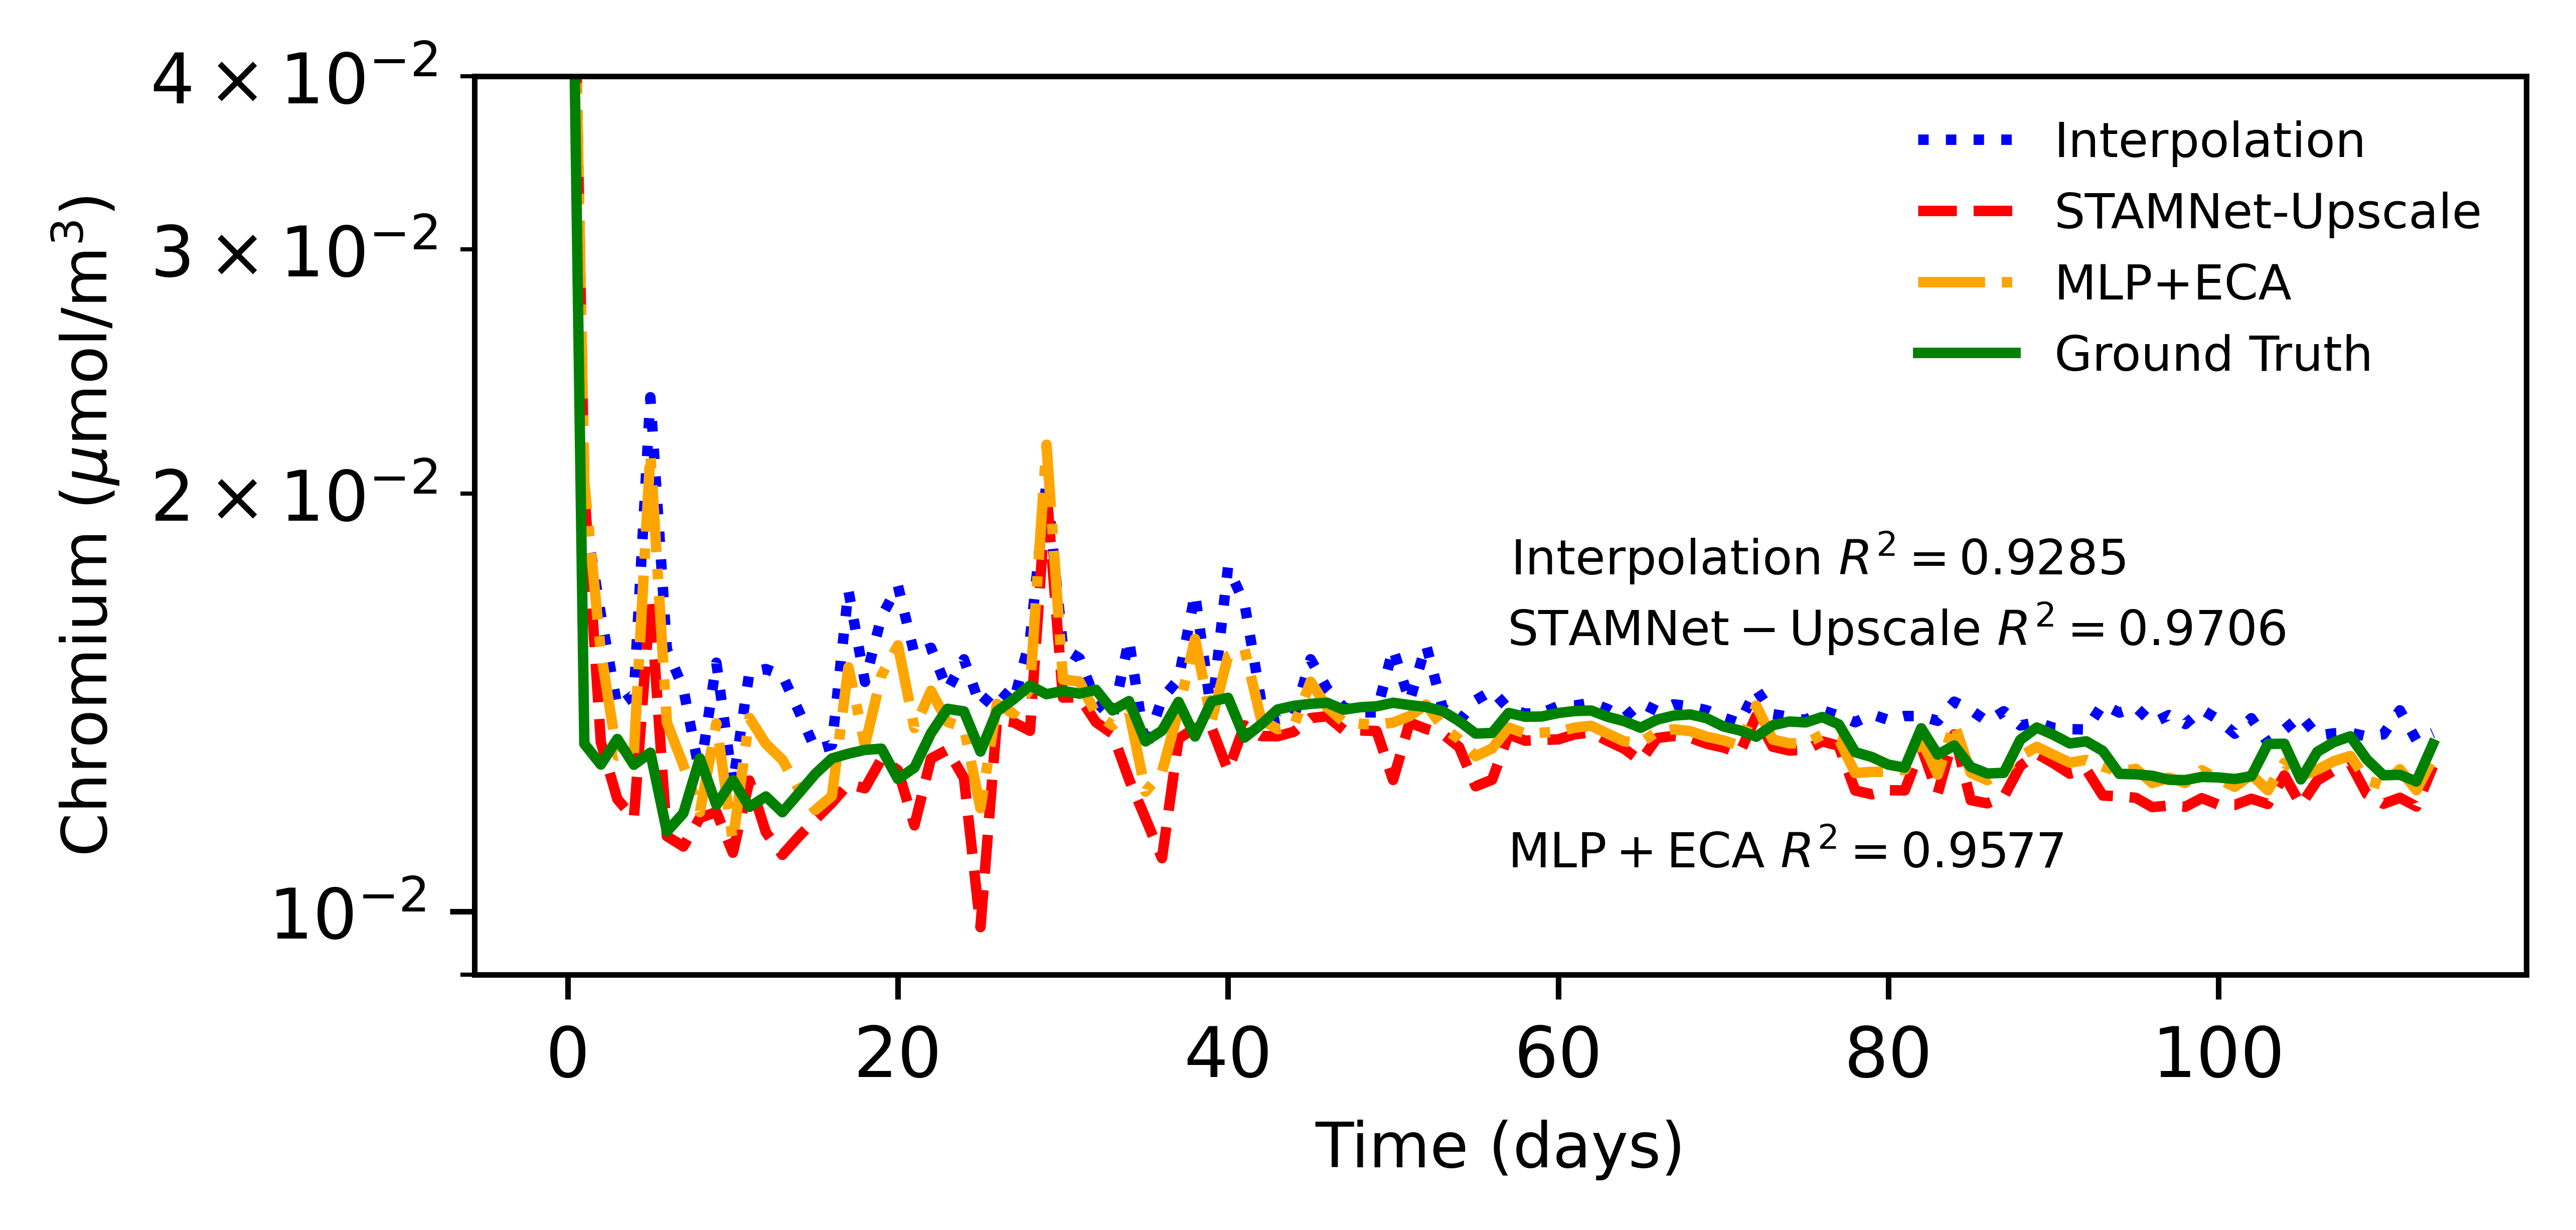

In [47]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,2.5),dpi=1000)
plt.plot(torch.mean(inputs[idx].detach().cpu(),(0,2,3)), c='b', ls=':')
plt.plot(torch.mean(outputs[idx].detach().cpu(),(0,2,3)), c='r', ls='--')
plt.plot(torch.mean(outputs_eca[idx].detach().cpu(),(0,2,3)), c='orange', ls='-.')
plt.plot(torch.mean(labels[idx].detach().cpu(),(0,2,3)), c='g')

# low speed
# 0.8945628509394937
# 0.8552690954093534
# -0.3599919719650999

# high speed
# 0.9891587677288192
# 0.977810917509046
# 0.9711279695253231

# 0.9914756912632711
# 0.9817130688678347
# 0.9314000214387418

#molass
# 0.8018122709994522
# 0.8038750026265371
# -0.5579241732397224

# 0.9705980206499916
# 0.9576639647753773
# 0.9285488608882269

plt.text(75.75, 1.8e-2, r'$\mathrm{Interpolation}\ R^2 = 0.9285$', 
         bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.2'),
         ha='center', va='center', fontsize=7)
plt.text(80.5, 1.6e-2, r'$\mathrm{STAMNet-Upscale}\ R^2 = 0.9706$', 
         bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.2'),
         ha='center', va='center', fontsize=7)
plt.text(73.8, 1.1e-2, r'$\mathrm{MLP+ECA}\ R^2 = 0.9577$', 
         bbox=dict(facecolor='white', edgecolor='white', boxstyle='round,pad=0.2'),
         ha='center', va='center', fontsize=7)
plt.ylabel(r'$\mathrm{Chromium}\ (\mu\mathrm{mol}/\mathrm{m^3})$', fontsize=9)
plt.xlabel('Time (days)',fontsize=9)
plt.legend(['Interpolation', 'STAMNet-Upscale', 'MLP+ECA','Ground Truth'], fontsize=7, edgecolor='white')
plt.yscale('log')
# plt.xscale('log')
# Adjust the layout
plt.tight_layout()
#plt.xlim([10,44])
plt.ylim([9e-3,4e-2])
# Save the figure with adjusted bbox
plt.savefig('time_comparison_full_upscale_crv_new.png', bbox_inches='tight', pad_inches=0.01)


76.14189
10.525617
175.50987
5.964905
3.9757762
2.4090655
3.8786688
133.97794
1.4032172
48.66538
35.967045
18.406431
135.09053


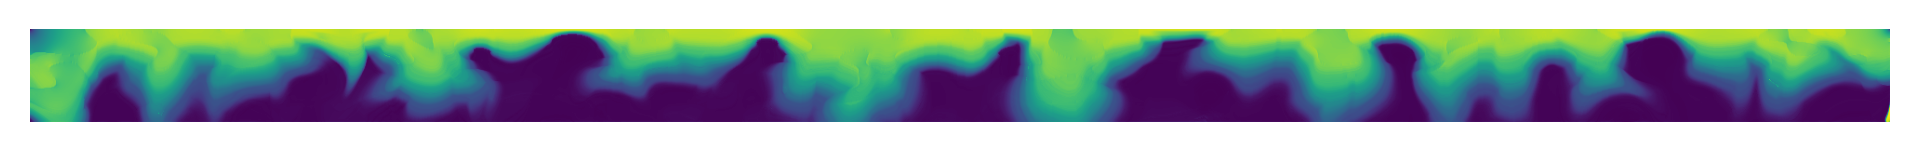

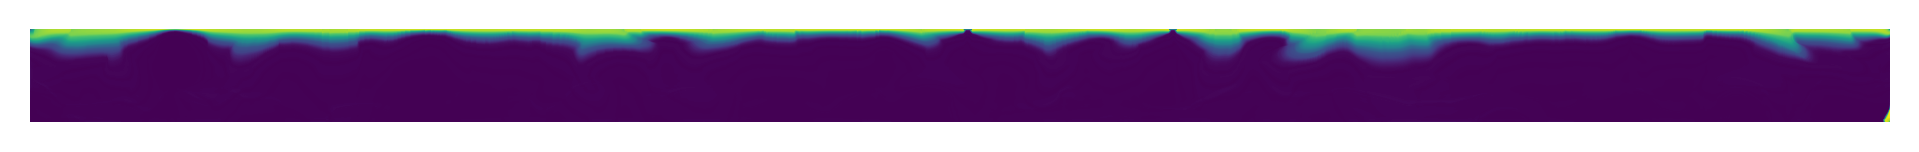

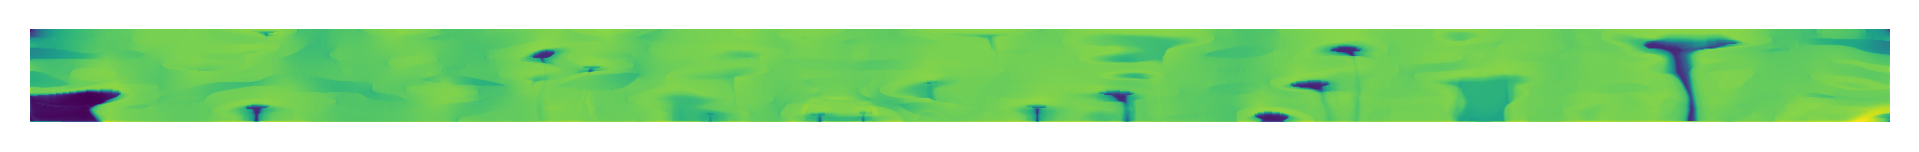

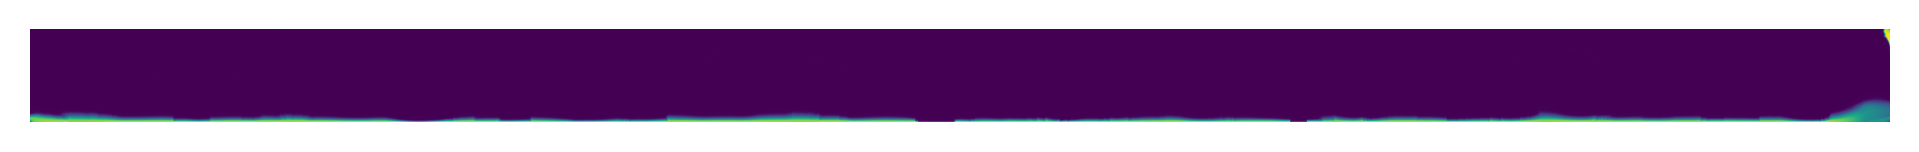

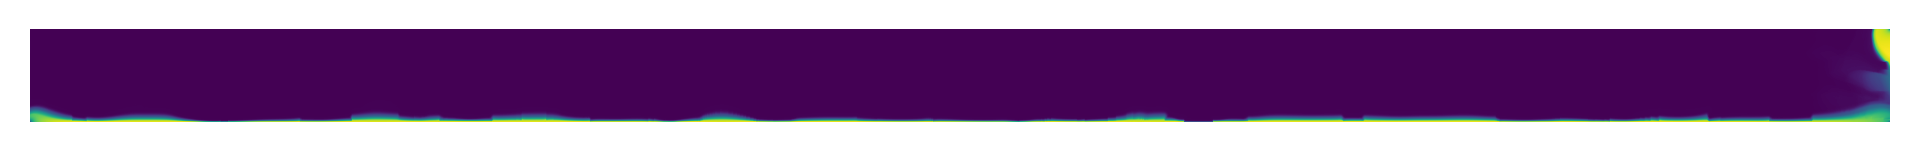

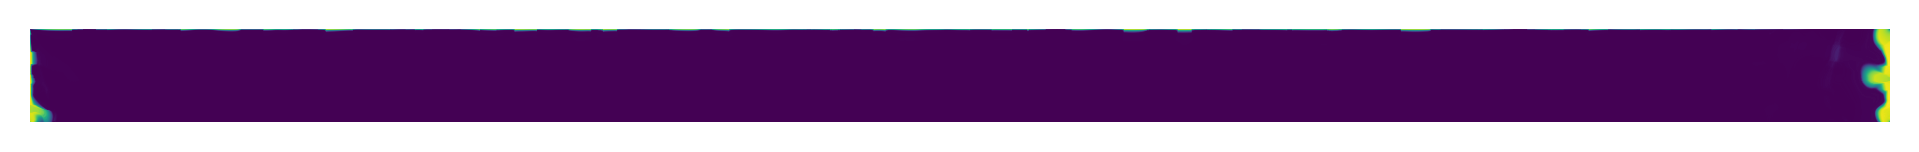

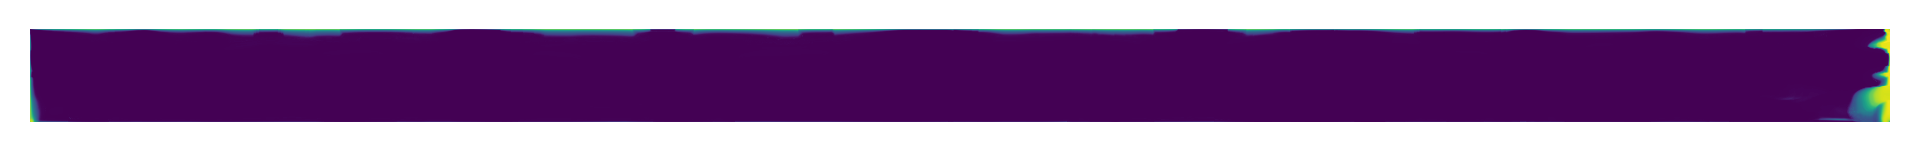

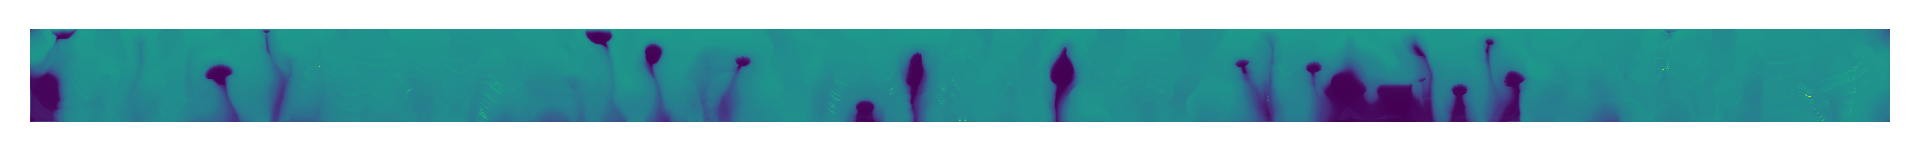

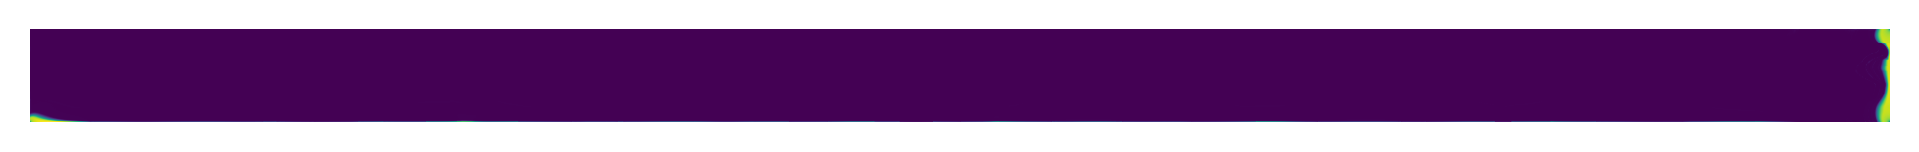

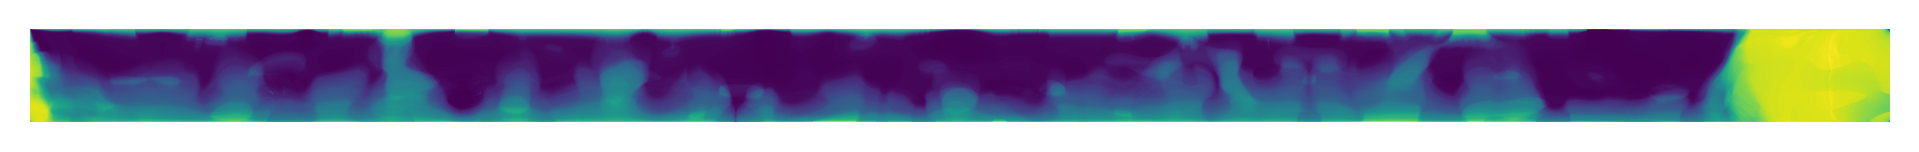

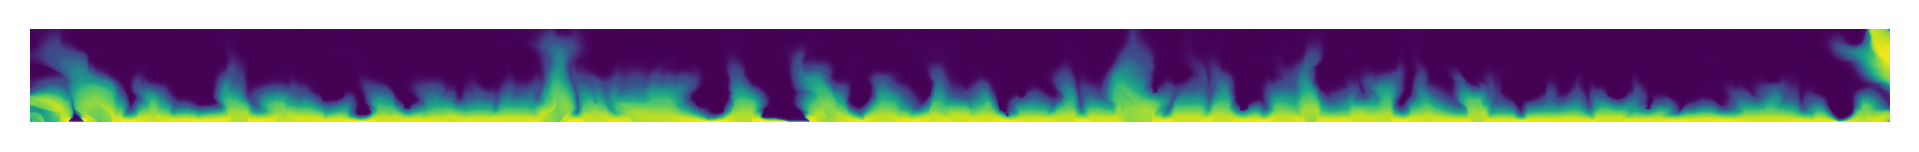

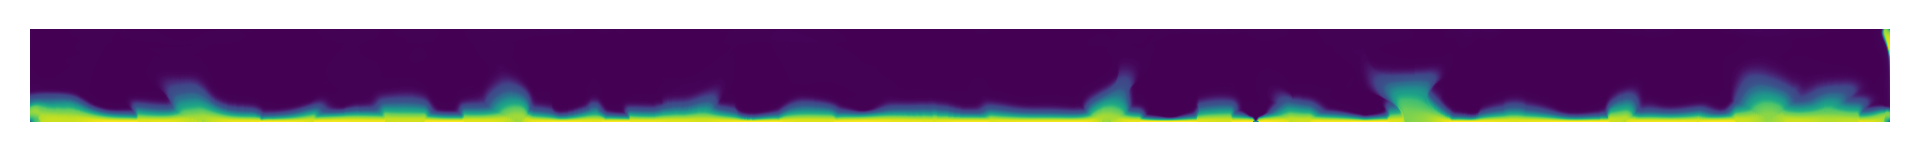

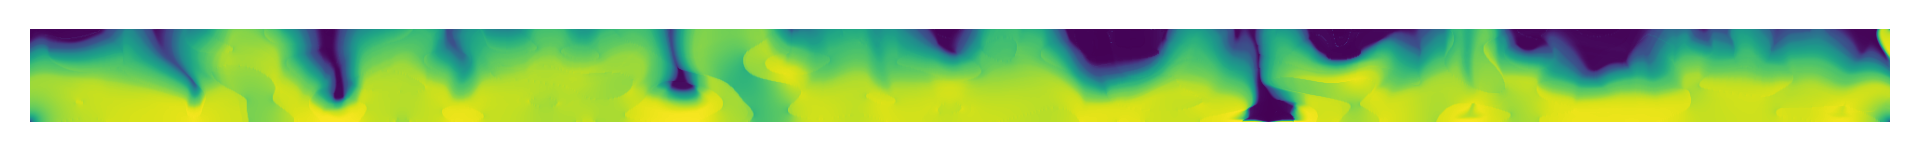

In [167]:
n=1
# for i in range(20,110,20):
for i in range(13):
    out = labels[i,:,:,:].cpu().detach().numpy()
    out = np.mean(out,0)
    print(np.mean(out))
    #out[out<=0] = np.min(out[out>0])
    import matplotlib.pyplot as plt
    from matplotlib.colors import LogNorm
    fig = plt.figure(figsize=(8,8), dpi=300)
    plt.imshow(out)
    plt.axis('off')
    # plt.savefig('output_t_'+str(i), bbox_inches='tight', pad_inches=0.1)
    #plt.show()
#plt.imshow(inputs[0,100,:,:,n].cpu().detach().numpy())
#fig.savefig('label.png')  # Replace 'output.png' with your desired file path and format

#field_names[n]
#plt.colorbar()

#orig_error = np.abs(np.mean(inputs[0,:,:,:,n].cpu().detach().numpy()) - np.mean(labels[:,:,:,n].cpu().detach().numpy()))

#nn_error = np.abs(np.mean(outputs[:,:,:].cpu().detach().numpy()) - np.mean(labels[:,:,:,n].cpu().detach().numpy()))
#print (orig_error, nn_error)

#high biomass test sims:
#0, 2, 7, 9, 12

#low biomass test sims:
#3,4,5,6,8